# <center>Pragmatism and the finite element method in the modern era</center>

<br>
<br>

## <center>Rezgar Shakeri

#### <center> Advisor: Jed Brown



<br>
<br>

##### <center>13 Sep 2023</center>

In [7]:
#from IPython.display import SVG, Video, HTML, IFrame
using Plots
default(linewidth=3)

# Motivation

<img align="center" src="rubber.png" width="100%" height="100%"/>

* Rubbers are low cost
materials capable of sustaining large elastic deformations without damage.
* Broad range of applications: critical sealing components in pressurised
systems, tyres for automobiles and aircraft, and the soles of shoes
* To predict the material behaviour to a prescribed loading which is a key aspect of a modern design process
#### 1) Constitutive modeling
#### 2) Accurate, efficent numerical solver

# Outline

## Constitutive equations
* Neo-Hookean
* Mooney-Rivlin
* Ogden
* Stable constitutive formulation

## Incompressiblity (small strain)
* Linear and mixed linear equation (locking)
* Stability of the mixed formulation
* Convergence study 

## Hyperelasticity
* Governing equation for $\boldsymbol u$ and $\boldsymbol u, p$ formulation
* Matrix-free implementation and Multigrid preconditioner

## Numerical Results
* High-order basis function in incompressible regime (displacement-based formulation)
* Displacement-based vs mixed formulation

## Conclusion and future work

# Preliminaries


<img align="center" src="general-motion.png" width="100%" height="100%"/>

* Deformation gradient
\begin{equation}
    \boldsymbol F = \nabla_X \phi(\boldsymbol X, t) = \frac{\partial \boldsymbol x}{\partial \boldsymbol X} = \boldsymbol{I} + \frac{\partial \boldsymbol u}{\partial \boldsymbol X}
    \label{deformation-gradient}
\end{equation}
* Displacement vector
\begin{equation}
    \boldsymbol u = \boldsymbol x - \boldsymbol X
    \label{displacement-vector}
\end{equation}
* Change in volume
\begin{equation}
    dv = J(\boldsymbol X, t) dV, ~ ~ J = \det \boldsymbol F > 0
    \label{definition-J}
\end{equation}
* Change in area
\begin{equation}
    d \boldsymbol a = J \boldsymbol F ^{-T} d\boldsymbol A
    \label{Nanson-formula}
\end{equation}
* Change in line
\begin{equation}
    d \boldsymbol x = \boldsymbol F d\boldsymbol X
\end{equation}

# Preliminaries


<img align="center" src="polar-decomposition.png" width="90%" height="90%"/>
Ref: http://commons.wikimedia.org/wiki/File:Polar_decomposition_of_F.png

* Polar decomposition
\begin{equation}
    \boldsymbol F = \boldsymbol R \textbf U = \textbf v \boldsymbol R, ~ ~ \text{where} ~ ~ \boldsymbol R \boldsymbol R^{T} = \boldsymbol I
\end{equation}
* Principal stretches 
\begin{equation}
	\textbf{U} \hat{\boldsymbol N}_i= \beta_i \hat{\boldsymbol N}_i, \quad \text{or} \quad \textbf{v} \hat{\boldsymbol n}_i= \beta_i \hat{\boldsymbol n}_i
    \label{stretch-tensor-eigensystem}
\end{equation}
where $\hat{\boldsymbol n}_i = \boldsymbol R \hat{\boldsymbol N}_i$

* Right and left Cauchy–Green tensors
\begin{equation}
	\boldsymbol C = \boldsymbol{F}^T \boldsymbol{F} = \textbf{U}^2. ~ ~ \boldsymbol b = \boldsymbol F \boldsymbol F^T = \textbf{v}^2.
    \label{right-left-cauchy-green}
\end{equation}
* Green-Lagrange and Green-Euler strains
\begin{equation}
  \boldsymbol E = \frac{1}{2} \left( \boldsymbol C - \boldsymbol I \right), ~ ~ ~ \boldsymbol e = \frac{1}{2} \left( \boldsymbol b - \boldsymbol I \right)
\end{equation}

* Eigenvalue relations
\begin{equation}
\beta_i^C = \beta_i^2, ~ ~ ~ \beta_i^E = \frac{1}{2} \left( \beta_i^2 - 1 \right) ~ ~ \quad i=1,2,3
\end{equation}

## Strain energy function and Constitutive equation


* For isotropic, $\psi$ can only depends on the invariants of $\boldsymbol C$ (or $\boldsymbol E$)
$$
\psi \left( \boldsymbol C \right) = \psi \left( \mathbb{I}_1, \mathbb{I}_2, \mathbb{I}_3 \right)
$$

where
\begin{eqnarray}
    \mathbb{I}_1 (\boldsymbol C) &=& \operatorname{trace} \boldsymbol C = \beta_1^2 + \beta_2^2 + \beta_3^2 \nonumber \\
    \mathbb{I}_2 (\boldsymbol C) &=& \frac 1 2 \left( \mathbb{I}_1^2 - \boldsymbol C \!:\! \boldsymbol C \right) = \beta_1^2 \beta_2^2 + \beta_2^2 \beta_3^2 + \beta_1^2 \beta_3^2 \nonumber \\
    \mathbb{I}_3 (\boldsymbol C) &=& \det \boldsymbol C = J^2 = \beta_1^2 \beta_2^2 \beta_3^2
    \label{invariants}
\end{eqnarray}

* Or we can have

$$
\psi \left( \boldsymbol C \right) = \psi \left( \beta_1, \beta_2, \beta_3 \right)
$$

* Constitutive equation is gradient of strain energy wrt $\boldsymbol E$ 
\begin{equation}
	\boldsymbol{S} = \frac{\partial \psi}{\partial \boldsymbol E} = 2 \frac{\partial \psi}{\partial \boldsymbol C} = 2 \sum_{i=1}^3 \frac{\partial\psi}{\partial \mathbb{I}_i} \frac{\partial\mathbb{I}_i}{\partial \boldsymbol C},
 \label{strain-energy-grad}
\end{equation}

* When $\psi(\beta_i)$ is a function of stretches

\begin{equation}
    \boldsymbol{S} = 2 \frac{\partial\psi}{\partial\boldsymbol C} = 2 \sum_{i=1}^3 \frac{\partial\psi}{\partial\beta_i^2} \frac{\partial\beta_i^2}{\partial\boldsymbol C} = \sum_{i=1}^3 S_i \hat{\boldsymbol N}_i \hat{\boldsymbol N}_i^T,
    \label{strain-energy-grad-stretch}
\end{equation}

where $S_i = \frac{1}{\beta_i} \frac{\partial \psi}{\partial \beta_i} $ are three principal stresses


# Isochoric-volumetric split

* It is most beneficial to split the deformation locally into a so-called volumetric
(dilational) part and an isochoric (distortional) part.

\begin{equation}
    \boldsymbol F = (J^{1/3} \boldsymbol I) \bar{\boldsymbol F} = J^{1/3} \bar{\boldsymbol F},
    \label{modified-deformation-gradient}
\end{equation}

\begin{equation}
    \bar{\boldsymbol C} = \bar{\boldsymbol F}^T \bar{\boldsymbol F} = J^{-2/3} \boldsymbol C
    \label{modified-right-cauchy-green}
\end{equation}

\begin{equation}
    \bar{\beta}_i = J^{-1/3} \beta_i, \, i=1,2,3
\end{equation}

\begin{equation}
\mathbb{\bar{I}}_1 = J^{-2/3}\mathbb{I}_1, \quad \mathbb{\bar{I}}_2 = J^{-4/3}\mathbb{I}_2
\end{equation}

\begin{equation}
\mathbb{\bar{I}}_3 = \left(J^{-2/3}\right)^3\mathbb{I}_3 = 1.
\end{equation}

* Neo-Hookean strain energy

\begin{eqnarray}
\psi &=& \psi_{\text{vol}}(J) + \psi_{\text{iso}}(\mathbb{\bar{I}}_1 ) \nonumber \\ 
     &=& \psi_{\text{vol}}(J) + \frac{\mu}{2} \left( \bar{\mathbb{I}}_1 - 3 \right)
\end{eqnarray}

* Mooney-Rivlin strain energy

\begin{eqnarray}
\psi &=& \psi_{\text{vol}}(J) + \psi_{\text{iso}}(\mathbb{\bar{I}}_1 , \mathbb{\bar{I}}_2) \nonumber \\
&=& \psi_{\text{vol}}(J) +\frac{\mu_1}{2} \left( \bar{\mathbb{I}}_1 - 3 \right) + \frac{\mu_2}{2} \left( \bar{\mathbb{I}}_2 - 3 \right)
\end{eqnarray}


# Isochoric-volumetric split

* Ogden strain energy

\begin{eqnarray}
\psi &=& \psi_{\text{vol}}(J) + \psi_{\text{iso}} = \psi_{\text{vol}}(J) + \sum_{i=1}^3\bar{\omega}(\bar{\beta}_i) \nonumber \\
\end{eqnarray}

where
\begin{equation}
\bar{\omega}(\bar{\beta}_i) = \sum_{j=1}^{N}\frac{\mu_j}{\alpha_j}\left(\bar{\beta}_i^{\alpha_j} - 1 \right)
\end{equation}

\begin{equation}
    2\mu = \sum_{j=1}^N \mu_j \alpha_j \quad \text{with} \quad \mu_j \alpha_j > 0
    \label{ogden-param-condition}
\end{equation}

\begin{eqnarray}
\boldsymbol S &=& \frac{\partial \psi}{\partial \boldsymbol E} =\frac{\partial \psi_{\text{vol}}}{\partial J} \frac{\partial J}{\partial \boldsymbol E} + \sum_{i=1}^3 \frac{\partial\psi_{\text{iso}}}{\partial \mathbb{\bar{I}}_i} \frac{\partial \mathbb{\bar{I}}_i}{\partial \boldsymbol E} \\
&=& \boldsymbol S_{\text{vol}} + \boldsymbol S_{\text{iso}}
\end{eqnarray}

The volumetric part is the same for all models
\begin{equation}
    \psi_{\text{vol}} = \frac{\kappa}{4} \left( J^2 - 1 -2 \log J \right)
    \label{volumetric-energy-kappa}
\end{equation}

\begin{equation}
    \boldsymbol S_{\text{vol}} = \frac{\kappa}{2} (J^2 -1)\boldsymbol C^{-1}
    \label{S-vol-unstable}
\end{equation}

# Isochoric-volumetric split

* Neo-Hookean model
\begin{equation}
	\boldsymbol S_{\text{iso}} = \mu J^{-2/3}\left(\boldsymbol{I} - \frac{1}{3} \mathbb{I}_1 \boldsymbol{C}^{-1} \right)
\end{equation}
* Ogden model
\begin{equation}
	\boldsymbol S_{\text{iso}}
	=2\frac{\partial \psi_{\text{iso}} (\bar{\beta}_i)}{\partial \boldsymbol C}
 = \sum_{i=1}^{3} S_i \hat{\boldsymbol N}_i \hat{\boldsymbol N}_i^T
\end{equation}

where

\begin{eqnarray}
	S_i &=& \frac{1}{\beta_i}\frac{\partial \psi_{\text{iso}}}{\partial \beta_i}
	=\frac{1}{\beta_i}\frac{\partial \bar{\beta}_k}{\partial \beta_i}
	\frac{\partial \psi_{\text{iso}}}{\partial \bar{\beta}_k} \nonumber \\
	&=&\frac{J^{-1/3}}{\beta_i} \left(\delta_{ik} -\frac{1}{3}\bar{\beta}_i^{-1}\bar{\beta}_k \right)\sum_{j=1}^N \mu_j \bar{\beta}_k^{\alpha_j - 1}
\end{eqnarray}

## Surprise

<div style="font-size: 50px", class="alert alert-block alert-danger">
All standard formulations have stability issue
</div>

# Source of instability

### 1) Subtractive cancellation, or loss of significance

#### What  is the results of  (1.0000 −1.0012 ) in five decimal digits?
#### It is $ -0.00012$  or $-1.2 \times 10^{-3}$

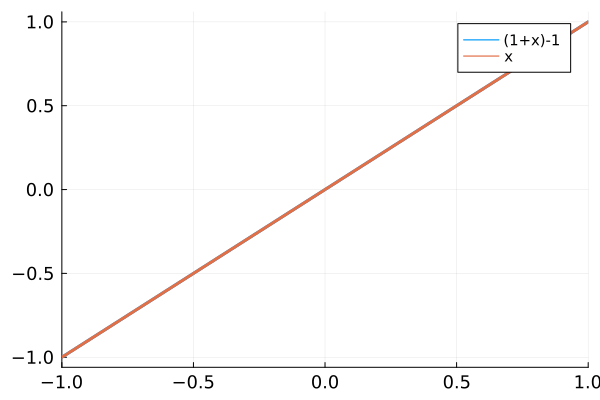

In [9]:
plot(x -> (1 + x) - 1, xlims=(-1e-0 , 1e-0), label = "(1+x)-1")

plot!(x -> x, label= "x", tickfontsize=12, legendfontsize=10)

### 2) Condition number of function $f(x)$

### $$\kappa_f(x) = \lvert \frac{x f^{'}(x)}{f(x)} \rvert$$
### What is the condition number of $f(x) = \log(1+x)$ when $x \approx 0$?
### $$\kappa_f(x) = \frac{x}{1+x}\frac{1}{\log(1+x)} \longrightarrow \infty$$

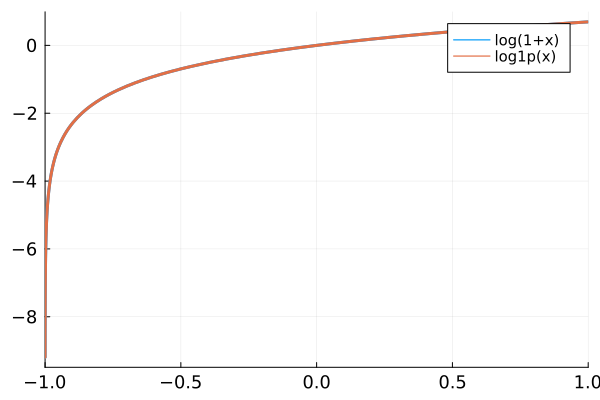

In [10]:
plot(x -> log(1 + x), xlims=(-1e-0 , 1e-0), label = "log(1+x)")

plot!(x -> log1p(x), label= "log1p(x)", tickfontsize=12, legendfontsize=10)

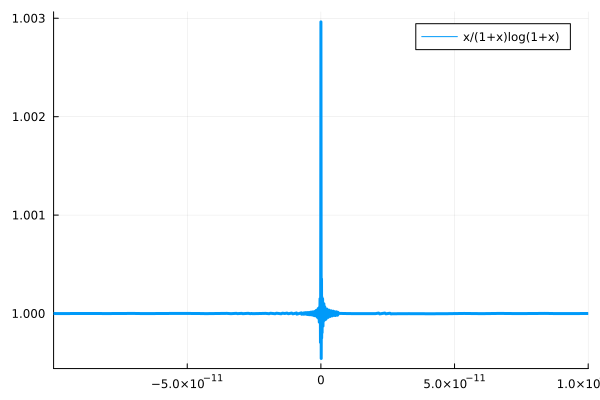

In [11]:
plot(x -> abs(x / ((x+1)*log(x+1))), xlims=(-1e-10, 1e-10), label = "x/(1+x)log(1+x)")

# Stable constitutive equations

Software packages (Abaqus UMAT, MOOSE, Albany-LCM, ...) make use of $\boldsymbol F$ in their implementations.

\begin{equation}
    \boldsymbol{E} =  \frac{1}{2} \left(\boldsymbol C - \boldsymbol{I} \right) = \frac{1}{2} \left(\boldsymbol{F}^T \boldsymbol{F} - \boldsymbol{I} \right)
\end{equation}
when dispalcement is small we have loss of significance.

What if we substitute $\boldsymbol F = \boldsymbol I + \boldsymbol H$, where $\boldsymbol H = \nabla_X \boldsymbol u$

\begin{equation}
    \boldsymbol{E} =  \frac{1}{2} \left(\boldsymbol H + \boldsymbol H^T + \boldsymbol H^T \boldsymbol H \right)
\end{equation}

# Stable constitutive equations

$$
\boldsymbol S_{\text{vol}} = \frac{\kappa}{2} (J^2 -1)\boldsymbol C^{-1}
$$

Standard approach

$$
\boldsymbol{F} = \begin{bmatrix}
1 + u_{0,0} & u_{0,1} \\
u_{1,0} & 1 + u_{1,1}
\end{bmatrix}
$$

$$
J = 1 + (u_{0,0} + u_{1,1}) + u_{0,0} u_{1,1} - u_{0,1} u_{1,0} 
$$

Stable computation of $\mathtt{J_{-1}}=J - 1$ 

$$
\mathtt{J_{-1}} = u_{0,0} + u_{1,1} + u_{0,0} u_{1,1} - u_{0,1} u_{1,0} 
$$

<img align="center" src="Jm1.png" width="90%" height="90%"/>

$\log J$ which appears in some constitutive models also has a huge condition number 
$\kappa_{\log}(J) = 1 / \log J $ when $ J \approx 1$.

\begin{equation}
	\log J = \mathtt{\log1p} \left(\mathtt{J_{-1}} \right).
    \label{logJ-stable}
\end{equation}

# Eigen solver 

* For Ogden model we need to solve an eigensystem of 3x3 symmetric matrix

* Suppose we create a matrix with eigenvalues 

$$ 1, \,\, 0.5 + e, \,\,  0.5 - e $$

$\qquad$ where $e \in (\epsilon_{\text{machine}}, 0.1)$

<img align="center" src="eigenvalue-error.png" width="90%" height="90%"/>

# Stable eigen solver 

Isaac Harari, Uri Albocher 2022: Computation of eigenvalues of a real, symmetric 3 × 3 matrix with particular reference to the pernicious case of two nearly equal eigenvalues

<img align="center" src="eigenvalue-error2.png" width="90%" height="90%"/>

<img align="center" src="eigenvector-error.png" width="90%" height="90%"/>

<img align="center" src="eigenvector-error2.png" width="90%" height="90%"/>

<img align="center" src="survey-softwares.png" width="90%" height="90%"/>

<div class="alert alert-block alert-success", style="font-size: 50px">
we derived stable constitutive formulation for hyperelastic materials
</div>


# Governing equation and Incompressiblity ($\color{blue}{\text{small strain}} $)

* $\color{blue}{\text{Linear elasticity (strong form)}}$ 
\begin{eqnarray}
    \nabla \cdot \boldsymbol \sigma + \boldsymbol f = 0. \qquad \text{in $\Omega$} 
\end{eqnarray}
where
\begin{eqnarray}
    \boldsymbol \sigma &=& \lambda \operatorname{trace} \boldsymbol \varepsilon ~ \boldsymbol I + 2 \mu \boldsymbol \varepsilon \\
    \boldsymbol \varepsilon(\boldsymbol u) &=& \frac{1}{2} \left( \nabla \boldsymbol u + (\nabla \boldsymbol u)^T \right)
\end{eqnarray}

\begin{equation}
    \lambda = \frac{2\nu\mu}{1-2\nu}
    \label{lambda-definition}
\end{equation}

* Incompressibility: $\nu \longrightarrow 0.5$, as a result $\lambda \longrightarrow \infty $ 

* One approach is to define new variable $p$ 
\begin{eqnarray} 
	p &=& - \frac{\operatorname{trace} \boldsymbol \sigma}{3} = -(\lambda+2\mu/3) \operatorname{trace} \boldsymbol \varepsilon \\
    &=& -\kappa \operatorname{trace} \boldsymbol \varepsilon
\end{eqnarray}
substituting $\lambda = \kappa - 2 \mu / 3$ in definition of $\boldsymbol \sigma$

\begin{eqnarray}
\boldsymbol \sigma &=& \kappa \operatorname{trace} \boldsymbol \varepsilon ~ \boldsymbol I + 2 \mu \boldsymbol \varepsilon_{\text{dev}} \\
& = & -p ~ \boldsymbol I + 2 \mu \boldsymbol \varepsilon_{\text{dev}}
\end{eqnarray}

* $\color{blue}{\text{Mixed-Linear elasticity (strong form)}}$
\begin{eqnarray}
    \nabla \cdot \boldsymbol \sigma + \boldsymbol f   &=& 0. \qquad \text{in $\Omega$} \nonumber \\
	\nabla\cdot\boldsymbol u + \frac{p}{\kappa} &=& 0. \qquad \text{in $\Omega$}
    \label{mixed-linear-strong-form}
\end{eqnarray}

# Governing equation and Incompressiblity ($\color{blue}{\text{small strain}} $ )

$\color{blue}{\text{Mixed-Linear elasticity (weak form)}}$

Find $(\boldsymbol u_h, p_h) \in \mathbb{V}_h \times \mathbb{Q}_h $, such that for all $(\boldsymbol v, q) \in \mathbb{V}_h^0 \times \mathbb{Q}_h$

\begin{eqnarray}
     a(\boldsymbol v, \boldsymbol{u}_h) + b(\boldsymbol v, p_h) &=& (\boldsymbol v, \boldsymbol f) + \langle \boldsymbol v, \boldsymbol g^{\boldsymbol u}\rangle_{\partial \Omega^{N}} \nonumber \\
     b(q, \boldsymbol{u}_h) + c(q, p_h) &=& 0
     \label{mixed-linear-weak-form2}
\end{eqnarray}

where
\begin{equation}
a(\boldsymbol v, \boldsymbol{u}_h) = \int_{\Omega} 2\mu \: \boldsymbol \varepsilon(\boldsymbol v) \!:\! \boldsymbol \varepsilon(\boldsymbol u_h) \: dv, ~ ~ b(q, \boldsymbol u_h)  = -\int_{\Omega} q \: \nabla \cdot \boldsymbol u_h \:dv, ~ ~ c(q, p_h)  = - \int_{\Omega} \frac{1}{\kappa} \: q \: p_h \:dv
\end{equation}

\begin{equation}
\begin{bmatrix}
\boldsymbol{A} & \boldsymbol{B}^T \\
\boldsymbol{B} & \boldsymbol{C}
\end{bmatrix}
\begin{bmatrix}
\boldsymbol{u}\\
\boldsymbol{p}
\end{bmatrix}
= \begin{bmatrix}
\boldsymbol{F}\\
\boldsymbol{0}
\end{bmatrix}
\end{equation}


## $\color{blue}{\text{Are we allowed to use any interpolation order for } (\boldsymbol u, p) ?} $


<img align="center" src="mixed-element.png" width="75%" height="75%"/>

### Brezzi-Babuska condition:

Find $\lambda \in \mathbb{R}$, $0 \neq (\boldsymbol u_h, p_h) \in \mathbb{V}_h \times \mathbb{Q}_h $, such that for all $(\boldsymbol v, q) \in \mathbb{V}_h^0 \times \mathbb{Q}_h$

\begin{equation}
    a(\boldsymbol v, \boldsymbol u) + b(\boldsymbol v, p) + b(q, \boldsymbol u) = -\lambda \langle p, q \rangle_{\mathbb{Q}} 
\end{equation}

then, $\lambda \geq 0$ and inf-sup constant is $\beta_h = \sqrt{\lambda_{\text{min}}}$. 

# Inf-sup constant for element with $\color{blue}{\text{continuous}} $ pressure

<img align="center" src="cont-p-1.png" width="80%" height="80%"/>

<img align="center" src="cont-p-10.png" width="80%" height="80%"/>

# Inf-sup constant for element with $\color{blue}{\text{discontinuous}} $ pressure

<img align="center" src="dist-p-1.png" width="80%" height="80%"/>

### Q1P0 and Q3Q2 are unstable

<img align="center" src="dist-p-10.png" width="80%" height="80%"/>

### Q2P1 is unstable for stretch element

### Srinivasan et al. (1994) 
<img align="center" src="1994-Srinivasan.png" width="80%" height="80%"/>

### Gültekin et al (2019), ABAQUS, ... use Q1P0


# Convergence study for element with $\color{blue}{\text{continuous}} $ pressure

### Comparing $Q_kQ_{k-1}$ and $Q_kQ_{k-2}$ convergence order for $n\times n$ uniform elements

<img align="center" src="conv-study-cont.png" width="75%" height="75%"/>

### In 2D, total DoFs/element $Q_2Q_1$:22,   $Q_3Q_1$:36 

# Convergence study for element with $\color{blue}{\text{discontinuous}} $ pressure

### Comparing $Q_kP_{k-1} \, (k > 1)$ and $Q_kQ_{k-2}$ convergence order for $n\times n$ uniform elements

<img align="center" src="conv-study-disc.png" width="80%" height="80%"/>

### In 2D, total DoFs/element $Q_2P_1$:21,   $Q_3Q_1$:36 

<div class="alert alert-block alert-success", style="font-size: 50px">
We determined the inf-sup stable mixed element
</div>

# Governing equation and Incompressiblity ($\color{blue}{\text{finite strain}} $ )

### Incompressibility constraint
$$
J - 1 = 0
$$

### Lagrange-multiplier method
\begin{eqnarray}
    \Pi_{\text{L}}(\boldsymbol u, \hat{p}) &=& \Pi_{\text{int}}(\boldsymbol u, \hat{p}) + \Pi_{\text{ext}}(\boldsymbol u) \nonumber \\
    \Pi_{\text{int}}(\boldsymbol u, \hat{p}) &=& \int_{\Omega_0} \left[\hat{p} \, \left(J - 1 \right) + \psi_{\text{iso}} \right]dV \nonumber 
\end{eqnarray}
$\hat p$ is Lagrange multiplier NOT the pressure

### Perturbed Lagrange-multiplier method
\begin{eqnarray}
    \Pi_{\text{PL}}(\boldsymbol u, \hat{p}) &=& \Pi_{\text{int}}(\boldsymbol u, \hat{p}) + \Pi_{\text{ext}}(\boldsymbol u) - \frac{1}{2} \int_{\Omega_0} \frac{1}{\kappa} \hat{p}^2 d V \\
    \Pi_{\text{int}}(\boldsymbol u, \hat{p}) &=& \int_{\Omega_0} \left[\hat{p} \, U(J) + \psi_{\text{iso}} \right]dV \nonumber 
\end{eqnarray}

where $U(J)$ is strictly convex function, and  $U(J)=0$ *if and only if* $J=1$.

# Governing equation and Incompressiblity ($\color{blue}{\text{finite strain}} $ )

### Constitutive equation for pressure 
\begin{eqnarray}
    p &=& - \frac{\operatorname{trace} \boldsymbol \sigma}{3} = -\frac{1}{3J} \operatorname{trace} (\boldsymbol F \boldsymbol S \boldsymbol F^T) \\
    &=& -\frac{1}{3J} \operatorname{trace} (\boldsymbol S \boldsymbol C) = - \frac{\partial \psi_{\text{vol}}}{\partial J},
\end{eqnarray}

we need to update $\boldsymbol{S}_{\text{vol}} = -p J \boldsymbol{C}^{-1}$

* Strong form

\begin{eqnarray}
    \nabla_X \cdot \boldsymbol P + \boldsymbol f   &=& 0. \qquad \text{in $\Omega_0$} \nonumber \\
	\frac{\partial \psi_{\text{vol}}}{\partial J} + \frac{p}{\kappa} &=& 0. \qquad \text{in $\Omega$}
\end{eqnarray}

* $\color{blue}{\text{Displacement-based formulation}} $ 

\begin{equation}
\boldsymbol{S} = \frac{\partial \psi}{\partial \boldsymbol{E}} =  \frac{\partial \psi_{\text{vol}}}{\partial J}  \frac{\partial J}{\partial \boldsymbol{E}} +  \frac{\partial \psi_{\text{iso}}}{\partial \boldsymbol{E}} = \boldsymbol{S}_{\text{vol}} + \boldsymbol{S}_{\text{iso}}
\end{equation}

$\qquad$ where $\boldsymbol{S}_{\text{vol}} =\frac{\kappa}{2} (J^2 -1)\boldsymbol C^{-1}$

* Strong form

\begin{equation}
\nabla_X \cdot \boldsymbol{P} + \boldsymbol{f} = 0  \qquad \text{in $\Omega_0$}
\end{equation}

$\qquad$ where $\boldsymbol{P}=\boldsymbol{FS}$

\begin{eqnarray}
    \int_{\Omega_0} \nabla_X \boldsymbol v \!:\! \boldsymbol P \: dV &=& \int_{\Omega_0}\boldsymbol v \cdot \boldsymbol f \:dV\int_{\partial \Omega^{N}_0} \boldsymbol v \cdot \bar{\boldsymbol t} \: dS \nonumber \\
    \int_{\Omega_0} q \: \left( \frac{\partial \psi_{\text{vol}}}{\partial J} + \frac{p}{\kappa} \right) \: J \: dV &=& 0
    \label{mixed-hyperelastic-weak-form}
\end{eqnarray}

# Matrix-free implementation

####  Finite Element Formulation
\begin{align}
    \text{Residual:} \quad \boldsymbol{v}^T F(\boldsymbol{u}) &\sim \int_\Omega \boldsymbol{v} \cdot \color{olive}{f_0(\boldsymbol{u}, \nabla \boldsymbol{u})} + \color{black}{\nabla \boldsymbol{v}} : \color{olive}{f_1(\boldsymbol{u}, \nabla \boldsymbol{u})} \nonumber \\ 
    \text{Jacobian:} \quad \boldsymbol{v}^T J \operatorname{d}\! \boldsymbol{u} &\sim \int_\Omega \begin{bmatrix} \boldsymbol{v} \\ \nabla \boldsymbol{v} \end{bmatrix}^T \color{teal}{\begin{bmatrix} f_{0,0} & f_{0,1} \\ f_{1,0} & f_{1,1} \end{bmatrix}}
    \begin{bmatrix} \operatorname{d}\! \boldsymbol{u} \\ \nabla \operatorname{d}\! \boldsymbol{u} \end{bmatrix} \nonumber
\end{align}


\begin{eqnarray}
    \boldsymbol J(\boldsymbol u^k) \operatorname{d} \boldsymbol u^{k} &=& - \boldsymbol R(\boldsymbol u^{k}), \nonumber\\
    \boldsymbol u^{k+1} &=& \boldsymbol{u}^{k} + \operatorname{d} \boldsymbol u^{k}
\end{eqnarray}


<div class="alert alert-block alert-info", style="font-size: 40px">
For mixed problem we will have one more residual and Jacobian equations and we need to solve a block structure system.
</div>



We use Krylov subspace method at each newton iteration to solve

\begin{equation}
    \text{single field:} ~ ~\boldsymbol A \boldsymbol x = \boldsymbol b ~ ~ ~ ~ \text{mixed fields:} ~ ~ \begin{bmatrix}
\boldsymbol A & \boldsymbol B \\
\boldsymbol C & \boldsymbol D
\end{bmatrix} \begin{bmatrix}
\boldsymbol x \\
\boldsymbol y
\end{bmatrix} = \begin{bmatrix}
\boldsymbol b \\
\boldsymbol c
\end{bmatrix}
\end{equation}

Krylov iteration methods are not necessarily fast on their own, and the iterations count depends on condition number of the operator.

\begin{equation}
    \boldsymbol{P}^{-1} \boldsymbol A \boldsymbol x = \boldsymbol{P}^{-1} \boldsymbol b
    \label{linear-system-eq-preconditioner}
\end{equation}

For the preconditioner to be effective we need
* $\boldsymbol P^{-1} \boldsymbol z $ is easy to compute for any vector $\boldsymbol z$.
* The condition number of the preconditioned problem is smaller than the original problem.

One approach to apply $\boldsymbol P^{-1}$ is multigrid.

# Multigrid method

## h-multigrid
rely on mesh hierarchy

## p-multigrid

coarsens the operator by reducing the order of the basis functions

## algebraic multigrid (AMG)

extract all information from the assembled system matrix without requiring any mesh information

<img align="center" src="h-vs-p-multigrid.png" width="80%" height="100%"/>

<div class="alert alert-block alert-warning">
For unstructured mesh h-multigrid is difficult to implement
</div>

# p-Multigrid

<img align="center" src="p-multigrid-cycle.png" width="70%" height="70%"/>

* 2nd order Chebyshev/Jacobi iteration in the range $[0.1\lambda_{max}, 1.1\lambda_{max}]$
* $\lambda_{max}$ estimate eigenvalue of $\left(\text{diag}\boldsymbol{A}_f \right)^{-1}\boldsymbol{A}_f$
* AMG use only information of the matrix sparsity and its entries of the assembled operators

# Block preconditioner

\begin{eqnarray}
\boldsymbol M = \begin{bmatrix}
\boldsymbol A & \boldsymbol B \\
\boldsymbol C & \boldsymbol D
\end{bmatrix} &=& \begin{bmatrix}
\boldsymbol I & \boldsymbol 0 \\
\boldsymbol C \boldsymbol A^{-1}& \boldsymbol I
\end{bmatrix} \begin{bmatrix}
\boldsymbol A & \boldsymbol 0 \\
\boldsymbol 0 & \boldsymbol S
\end{bmatrix} \begin{bmatrix}
\boldsymbol I & \boldsymbol A^{-1} \boldsymbol B \\
\boldsymbol 0 & \boldsymbol I
\end{bmatrix} \nonumber \\
&=& \begin{bmatrix}
\boldsymbol I & \boldsymbol 0 \\
\boldsymbol C \boldsymbol A^{-1}& \boldsymbol I
\end{bmatrix} \begin{bmatrix}
\boldsymbol I & -\boldsymbol B \boldsymbol S^{-1}  \\
\boldsymbol 0 & -\boldsymbol I
\end{bmatrix} \begin{bmatrix}
\boldsymbol A & \boldsymbol 0 \\
\boldsymbol 0 & -\boldsymbol S
\end{bmatrix}  \nonumber \\
&=& \begin{bmatrix}
\boldsymbol A & \boldsymbol 0 \\
\boldsymbol C & \boldsymbol S
\end{bmatrix} \begin{bmatrix}
\boldsymbol I & \boldsymbol A^{-1}\boldsymbol B \\
\boldsymbol 0 & \boldsymbol I
\end{bmatrix} \nonumber \\
&=&\begin{bmatrix}
\boldsymbol I & \boldsymbol 0 \\
\boldsymbol C \boldsymbol A^{-1} & \boldsymbol I
\end{bmatrix}\begin{bmatrix}
\boldsymbol A & \boldsymbol B \\
\boldsymbol 0 & \boldsymbol S
\end{bmatrix}
\end{eqnarray}

where $\boldsymbol S = \boldsymbol D - \boldsymbol C \boldsymbol A^{-1} \boldsymbol B$ is called the Schur complement. 

\begin{equation}
\boldsymbol P = \begin{bmatrix}
\boldsymbol A & \boldsymbol B \\
\boldsymbol 0 & \boldsymbol S
\end{bmatrix} \longrightarrow \boldsymbol{M} \boldsymbol P^{-1} = \begin{bmatrix}
\boldsymbol I & \boldsymbol 0 \\
\boldsymbol C \boldsymbol{A}^{-1} & \boldsymbol I
\end{bmatrix}
\end{equation}

# Ratel: Extensible, Performance-Portable Solid Mechanics: (https://gitlab.com/micromorph/ratel)

<img align="center" src="ratel.png" width="75%" height="75%"/>

### [libCEED](https://libceed.readthedocs.io): Efficient Extensible Discretization

<img align="center" src="libCEEDAPI.png" width="50%" height="30%"/>


* <font color='red'>$\mathcal P$</font>: Process decomposition,

* $\mathcal E$</font> : Element restriction/assembly operator

* <font color='blue'>$B$</font> : Basis (DoFs-to-Qpts) evaluator, 

* <font color='green'>$D$</font> : Operator at quadrature point- Qfunction ($f_0, f_1, f_{0,0},...$)

* Purely algebraic high-order FEM Matrix-assembly and Matrix-free
* Single source Vanilla C for physics
* Various CPU and GPU backends with run-time selection `./bps -ceed /gpu/cuda`

# Numerical experiment: displacement-based formulation

<img align="center" src="Punch.png" width="45%" height="45%"/>

Ref: Kadapa, Hossain (2022), linearised consistent mixed displacement-pressure formulation for
hyperelasticity

### Isochoric Neo-Hookean model $E = 240.565$ Pa,  $\nu = 0.3,0.45,0.49$ with applied pressure $p=320$ Pa


<div class="alert alert-block alert-danger", style="font-size: 40px">
 High-order elements overcome locking effect!
</div>

<img align="center" src="IsoNH-Q2-0.3-16x10.gif" width="100%" height="100%"/>

<img align="center" src="pressure-Q2-Q3-0.3.png" width="75%" height="75%"/>

### $\nu=0.3$: Maximum pressure for Q2, Q3 elements are 160 Pa

<img align="center" src="pressure-Q2-Q3-0.45.png" width="75%" height="75%"/>

### $\nu=0.45$ Maximum pressure for Q2, Q3 elements are 320 Pa and 280 Pa

<img align="center" src="pressure-Q2-Q3-0.49.png" width="75%" height="75%"/>

### $\nu=0.49$ Maximum pressure for Q2, Q3 elements are 720 Pa and 420 Pa

<img align="center" src="Q2-Q3-table.png" width="75%" height="75%"/>

###  p-multigrid  preconditioner run in parallel (4 ranks)

# displacement-based vs mixed formulations (Neo-Hookean model)

<img align="center" src="pressure-Q2-Q2Q1-0.3.png" width="75%" height="75%"/>

### $\nu=0.3$ Maximum pressure for Q2, Q2Q1 elements are 190 Pa and 140 Pa

<img align="center" src="pressure-Q2-Q2Q1-0.49.png" width="75%" height="75%"/>

### $\nu=0.49$ Maximum pressure for Q2, Q2Q1 elements are 4600 Pa and 290 Pa

<img align="center" src="pressure-Q2-Q2Q1-0.49999.png" width="75%" height="75%"/>

### $\nu=0.49999$ Maximum pressure for Q2, Q2Q1 elements are 4100 Pa and 300 Pa

<img align="center" src="Q2-Q2Q1-table.png" width="75%" height="75%"/>

###  svd  preconditioner run in serial (1 rank)

* Ogden
\begin{eqnarray}
    \alpha_1 &=1.3, \qquad \mu_1 &= 6.3 \cdot 10^5 \, \text{Pa} \nonumber \\
    \alpha_1 &=5.0, \qquad \mu_1 &= 0.012 \cdot 10^5 \, \text{Pa} \nonumber \\
    \alpha_1 &=-2.0 \qquad \mu_1 &= -0.1 \cdot 10^5 \, \text{Pa} \\
    \label{ogden-material-properties}
\end{eqnarray}

Ref: Holzapfel Ch06

* Neo-Hookean

\begin{equation}
    2\mu = \sum_{j=1}^N \mu_j \alpha_j \quad \text{with} \quad \mu_j \alpha_j > 0
    \label{ogden-param-condition}
\end{equation}

$\mu = 4.225 \cdot 10^5 $

$\kappa = 10^5 \mu$

$\nu=0.499995$ and $E = 1.2675 \cdot 10^5 $ Pa.

<img align="center" src="u-NH-Og.png" width="75%" height="75%"/>

<img align="center" src="p-NH-Og.png" width="75%" height="75%"/>

# Conclusion and future works


<div class="alert alert-block alert-success", style="font-size: 45px">
We derived stable constitutive formulation for hyperelastic materials
</div>

### Stable numerics for finite strain elasticity
**Rezgar Shakeri**, Leila Ghaffari, Karen Stengel, Jeremy L. Thompson, Jed Brown  
    
<div class="alert alert-block alert-success", style="font-size: 45px">
We determined the inf-sup stable mixed element
</div>

<div class="alert alert-block alert-success", style="font-size: 45px">
We implemented a locking-free mixed hyperealstic formulation for Neo-Hookean, Mooney-Rivlin and Ogden models in matrix-free way
</div>

### Performance-portable p-multigrid for nonlinear solid mechanics with mixed elements
**Rezgar Shakeri**, Jeremy L. Thompson, Jed Brown  

<div class="alert alert-block alert-info", style="font-size: 50px">
Discontinuous pressure  
</div>

<div class="alert alert-block alert-info", style="font-size: 50px">
Implement the block preconditioner for the mixed-formulation.
</div>

<div class="alert alert-block alert-info", style="font-size: 50px">
Write current configuration formulation to reduce the solve time
</div>

<div class="alert alert-block alert-info", style="font-size: 50px">
Numerical experiment with different CPU and GPU backends in parallel.  
</div>

### Performance Portable Solid Mechanics via Matrix-Free p-Multigrid
Jed Brown, Valeria Barra, Natalie Beams, Leila Ghaffari, Matthew Knepley, William Moses, **Rezgar Shakeri**, Karen Stengel, Jeremy L. Thompson, Junchao Zhang

<img src="schwarz-compression.gif" width="50%" height="50%" align="bottom">

# Thank you!